In [1]:
#!git clone https://github.com/sobrad956/CMSC472FinalProject.git

In [2]:
#!cd CMSC472FinalProject/

In [3]:
import torch
import torchvision as tv
import torch.random
import os
import sys
from PIL import Image
from torchvision import transforms
from torchvision.datasets import Food101
from torchvision.transforms import ToTensor
import torchvision
import matplotlib.pyplot as plt 
import matplotlib

In [4]:
# assumes original color temp maxed out at (255,255,255)
# expect Tensor of [..., 3 (r,g,b), H, W]
class RandomSaltPepper(torch.nn.Module):
    def __init__(self, p=0.5, type='salt'):
        super().__init__()
        self.p = p
        self.salt = type in ['salt', 'both']
        self.pepper = type in ['pepper', 'both']
        self.color = []
        if self.salt:
            self.color.append(1)
        if self.pepper:
            self.color.append(0)
    
    def forward(self, imgs):
        if not len(self.color):
            return imgs
                    
        # probably slow AF and not pythonic
        for i, img in enumerate(imgs):
            for h, row in enumerate(img[0]):
                for w, _ in enumerate(row):
                    if torch.rand(1) < self.p:
                        imgs[i,:,h,w] = self.color[torch.randint(0, len(self.color), (1,)).item()]
        
        return imgs

class RandomGaussianNoise(torch.nn.Module):
    def __init__(self, mean=0, var=1):
        super().__init__()
        self.mean = mean
        self.var = var
        self.sigma = var ** 0.5
        
    def forward(self, imgs):
        noise = torch.normal(self.mean, self.sigma, imgs.shape)
        imgs += noise
        imgs = torch.clamp(imgs, 0, 1)
        return imgs


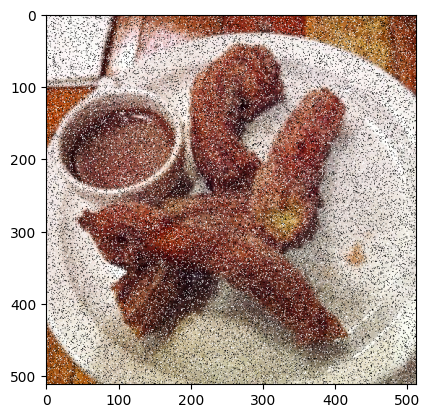

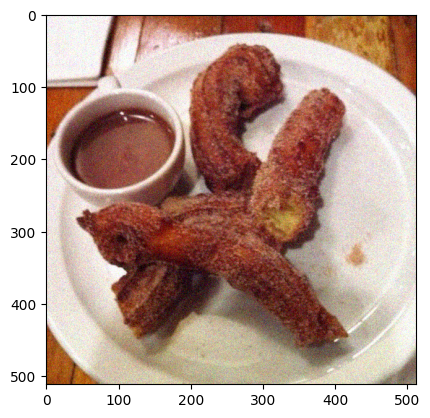

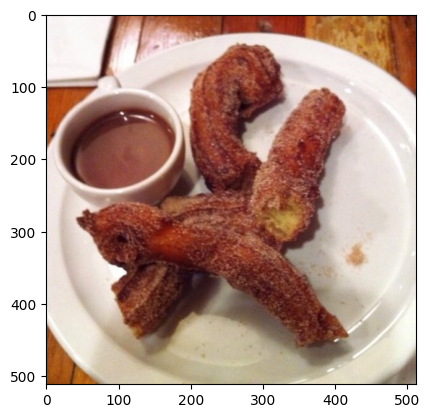

In [5]:
# simple testbench
if __name__ == '__main__':
    root = os.path.expanduser(os.path.expanduser(os.path.join('~', 'data')))
    dataset = Food101(root=root, download=True, transform=ToTensor())
    aug = RandomSaltPepper(p=0.2, type='both')
    aug2 = RandomGaussianNoise(mean=0,var=1./255.)
    oim = torch.unsqueeze(dataset[0][0], 0)
    aim = aug(torch.clone(oim))
    aim2 = aug2(torch.clone(oim))
    plt.figure(0)
    plt.imshow(aim[0].permute(1,2,0))
    plt.figure(1)
    plt.imshow(aim2[0].permute(1,2,0))
    plt.figure(2)
    plt.imshow(oim[0].permute(1,2,0))
    plt.show()

In [6]:
len(dataset)

75750

In [7]:
# Create Dataloaders
import torchvision.transforms as transforms
from torch.utils.data import DataLoader


normMean = [0.49139968, 0.48215827, 0.44653124]
normStd = [0.24703233, 0.24348505, 0.26158768]
normTransform = transforms.Normalize(normMean, normStd)


trainTransform = transforms.Compose([
        transforms.Resize([32, 32]),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        normTransform
    ])
  
testTransform = transforms.Compose([
        transforms.Resize([32, 32]),
        transforms.ToTensor(),
        normTransform
    ])
  
trainLoader = DataLoader(Food101(root=root, split="train", download=False, transform=trainTransform), batch_size = 64, shuffle=True)
valLoader = DataLoader(Food101(root=root, split="test", download=False, transform=testTransform), batch_size = 64, shuffle=False)

In [9]:
#Run Densenet
#import models

from models import RunNet

r = RunNet(model='DenseNet', trainLoader=trainLoader, valLoader=valLoader, verbose=True, experiment='baseline', nEpochs=2)
r.run()

  + Number of params: 800375


In [ ]:
#Run SqueezeNet
#import squeezenet

from models import RunNet

r = RunNet(model='SqueezeNet', trainLoader=trainLoader, valLoader=valLoader, verbose=True, experiment='baseline', nEpochs=2)
r.run()

  + Number of params: 781669
Train Epoch: 1.00, loss: 4.36, Error: 95.30 / 84.22, F1-Score: 0.03, Elapsed Time in Minutes: 2.21
Val set Epoch: 1.00, loss: 4.07, Error: 91.38 / 74.62, F1-Score: 0.06, Elapsed Time in Minutes: 0.64
Train Epoch: 2.00, loss: 3.99, Error: 90.30 / 72.13, F1-Score: 0.07, Elapsed Time in Minutes: 2.16
Val set Epoch: 2.00, loss: 3.78, Error: 87.70 / 66.53, F1-Score: 0.09, Elapsed Time in Minutes: 0.65
TOTAL TIME ELAPSED IN HOURS: 0.09


In [ ]:
#Run InceptionNet3
#import inceptionnet

from models import RunNet

r = RunNet(model='InceptionNet', trainLoader=trainLoader, valLoader=valLoader, verbose=True, experiment='baseline', nEpochs=2)
r.run()

  + Number of params: 23988293


KeyboardInterrupt: 